## Formation of Saturn's moons


We make a simulation of the formation of Saturn's moons in one dimension. For this, we use this article : https://arxiv.org/pdf/1301.3808, it traites of the tidal forces exerced on moons. 

We have two tidal forces exerced on one moon. First we have the tidal forces of Saturn's rings that is given with the differential equation :

$$\frac{d \Delta}{dt} = \frac{2^5 M}{3^3 M_S}D T_R^{-1} \Delta^{-3}$$

With $D$, $T_R$ somes constants given by the article, and $M_S$ is mass of Saturn. And $\Delta = \frac{r-r_R}{r_R}$ with $r_R$ the supposed radius of Saturn's rings.

The second force is the others moons tides given by this equation :

$$ \frac{d r}{dt} = \frac{3 k_{2p} (GM_S)^{1/2}R_p^5}{Q_p}\frac{M}{M_S} r^{-11/2} $$

With $r$ the distance of the moon and $k_{2p}$,$Q_p$ and $R_p$ some new constants given by the article.


In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import functions as fc
import importlib

In [70]:
year=31536000 ##nb de seconde en 1 année
rR= 140000 ##140 000 km 
Mp=1
Msat=5.68e26
G=6.6743e-11*Msat*year**2/1e9 ##conversion en masse de saturne (pour avoir directement q et non la masse) et année
Rp=60268 #60 268 km
D=3.7e-4
TR=2*np.pi/np.sqrt(G*Mp/rR**3) ##conversion en masse de saturne et année
Tdisk=3.1*10**5 
K=39*2.3e-4*Rp**5*(G*Mp)**(1/2)/2
F=23.5*D**3/TR
dt = 1e-4

##define the duration of the simulation

t=np.arange(0,10,dt)



In [64]:
importlib.reload(fc)
planets = [fc.planet(dt)]
d = np.ones_like(t)
delta = np.ones_like(t)
Mass = np.ones_like(t)

for i in range(len(t)):
    nb_accretion = 0
    d[i] = planets[0].r
    delta[i] = planets[0].delta
    Mass[i] = planets[0].M

    for j in range(len(planets)):
        j = j - nb_accretion ###probleme avec ca
        nb_accretion = planets[j].iteration(planets, j,nb_accretion,dt)
        
    if planets[-1].delta >= 8.4*D:
        planets.append(fc.planet(dt))
    


Text(0.5, 0, 'Time (Year)')

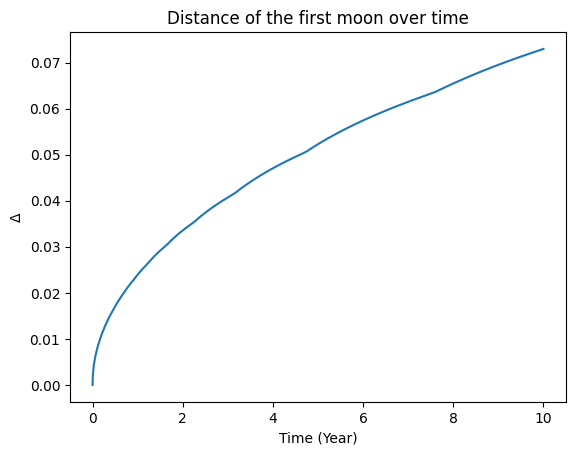

In [71]:
plt.title(r"Distance of the first moon over time")
plt.plot(t, delta)
plt.ylabel(r"$\Delta$")
plt.xlabel("Time (Year)")


Text(0.5, 0, 'Time (Year)')

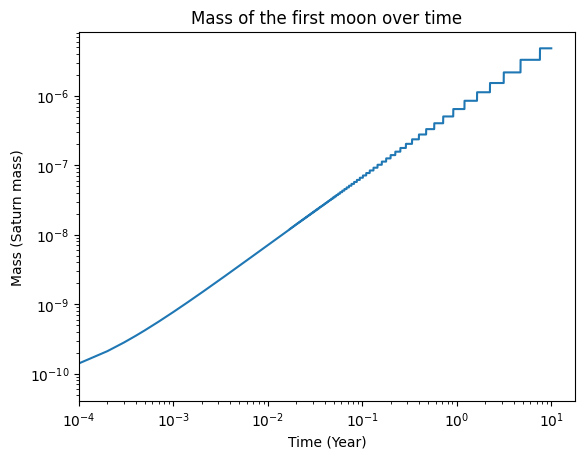

In [72]:
plt.title("Mass of the first moon over time")
plt.loglog(t, Mass,)
plt.ylabel(r"Mass (Saturn mass)")
plt.xlim(1e-4)
plt.xlabel("Time (Year)")


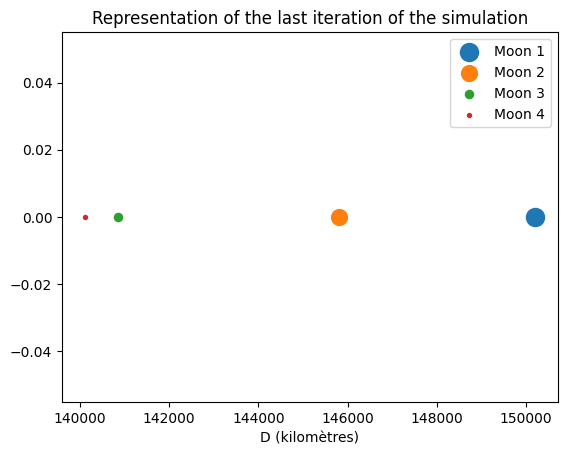

In [75]:
plt.title("Representation of the last iteration of the simulation")

for i in range(len(planets)):
   
    plt.scatter(planets[i].r, 0, s= 1e4*(planets[i].M)**(1/3), label = f"Moon {i+1}")

    plt.xlabel("D (kilomètres)")
plt.legend()
